#### Problem Statement: To prepare a machine learning  based model, trained on the House Price Prediction Dataset. 

In [1]:
#Importing the libraries required for importing the data i.e house price prediction.
import numpy as np
import pandas as pd

In [2]:
#Importing the data i.e house price prediction
df = pd.read_csv('./HousePricePrediction.csv')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


##### Now understanding the attributes used in the house price prediction so as to proceed further.

###### Id	To count the records.
###### MSSubClass	 Identifies the type of dwelling involved in the sale.
###### MSZoning	Identifies the general zoning classification of the sale.
###### LotArea	 Lot size in square feet.
###### LotConfig	Configuration of the lot
###### BldgType	Type of dwelling
###### OverallCond	Rates the overall condition of the house
###### YearBuilt	Original construction year
###### YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
###### Exterior1st	Exterior covering on house
###### BsmtFinSF2	Type 2 finished square feet.
###### TotalBsmtSF	Total square feet of basement area
###### SalePrice	To be predicted

In [3]:
#Checking the dataset
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [4]:
#Checking the missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

<Axes: >

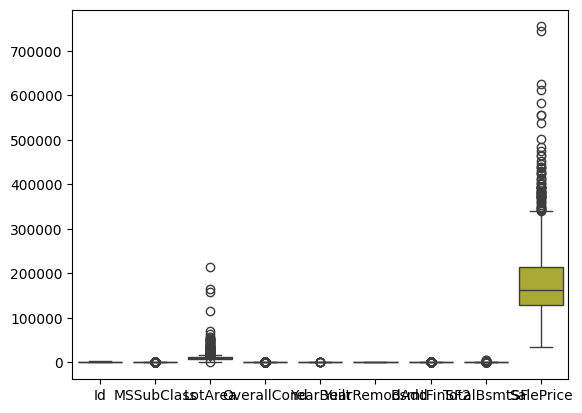

In [5]:
#Checking the outliers and importing the libraries for related libraries
import seaborn as sns
sns.boxplot(df)

In [6]:
#Checking the unique values in LotArea
df['LotArea'].unique()

array([ 8450,  9600, 11250, ...,  1894, 20000, 10441], dtype=int64)

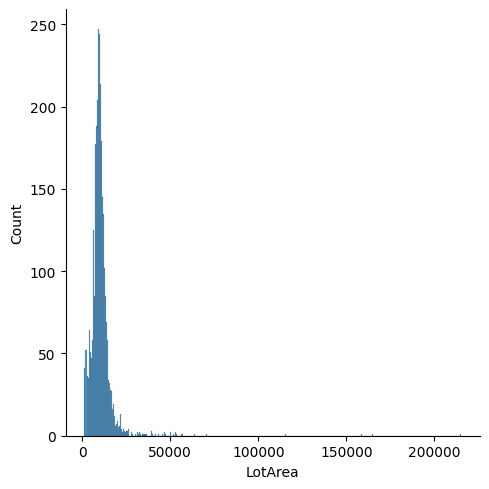

In [7]:
#Checking the distribution of LotArea
sns.displot(df['LotArea'])

In [8]:
#Now tranforming the outlier so as to get normal distribution and get avoid data noisy
q3 = df["LotArea"].quantile(0.75)  
q1 = df["LotArea"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)


In [9]:
# Transformed outlier attribute
df["LotArea"] = np.where(df["LotArea"]> upper_limit, upper_limit,
                        np.where(df["LotArea"]< lower_limit, lower_limit,
                          df["LotArea"]))

<Axes: ylabel='LotArea'>

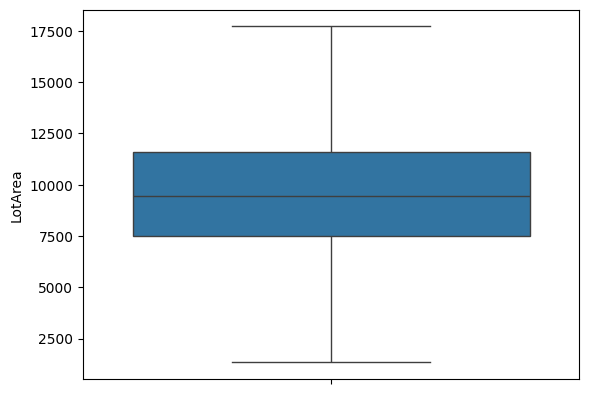

In [10]:
#Transformed outlier check
sns.boxplot(df['LotArea'])

<Axes: xlabel='LotArea', ylabel='Density'>

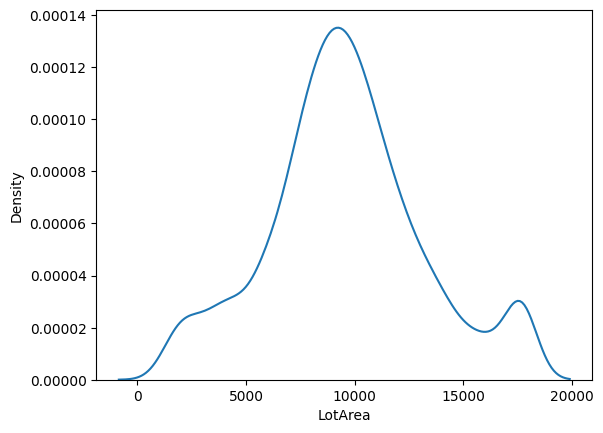

In [11]:
#Transformed outlier distribution
sns.kdeplot(df['LotArea'])

<Axes: xlabel='SalePrice', ylabel='Density'>

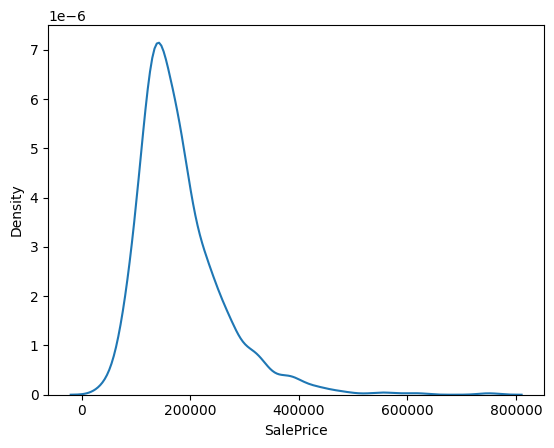

In [12]:
#Chcking the distribution of SalePrice
sns.kdeplot(df['SalePrice'])

In [13]:
#Now going it with SalePrice
#Now tranforming the outlier so as to get normal distribution and get avoid data noisy
q3 = df["SalePrice"].quantile(0.75)  
q1 = df["SalePrice"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)


In [14]:
# Transformed outlier attribute
df["SalePrice"] = np.where(df["SalePrice"]> upper_limit, upper_limit,
                        np.where(df["SalePrice"]< lower_limit, lower_limit,
                          df["SalePrice"]))

<Axes: ylabel='SalePrice'>

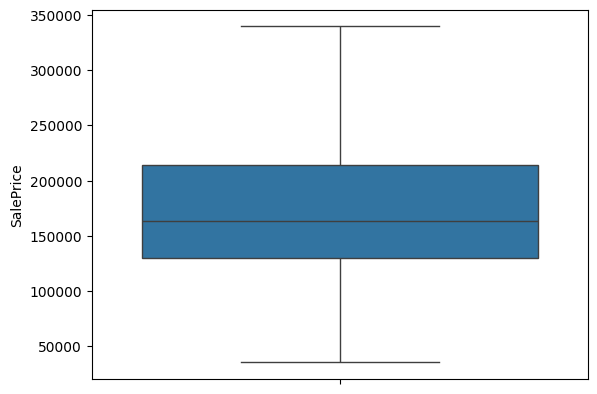

In [15]:
#Transformed outlier check
sns.boxplot(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

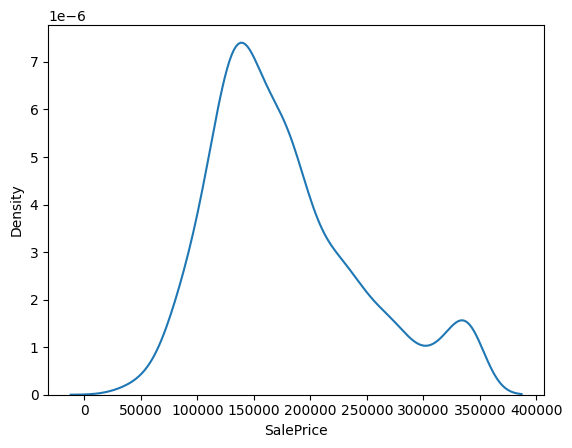

In [16]:
sns.kdeplot(df['SalePrice'])

In [17]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [18]:
#Now filling missing values
#Importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [19]:
imp = IterativeImputer(random_state=0)
imputed = imp.fit_transform(df[['SalePrice']])  # Pass SalePrice as a DataFrame
df['SalePrice'] = pd.DataFrame(imputed, columns=['SalePrice'])  # Convert the imputed values back to DataFrame

# Round the values
df['SalePrice'] = df['SalePrice'].round(0)

In [20]:
#The dataset with filled values
df['SalePrice'].astype(int)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
2914    177332
2915    177332
2916    177332
2917    177332
2918    177332
Name: SalePrice, Length: 2919, dtype: int32

In [21]:
df.isna().sum()

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [22]:
#Now we can drop low missing values ones
new_df = df.dropna()

In [23]:
new_df.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [24]:
new_df['SalePrice'].astype(int)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
2914    177332
2915    177332
2916    177332
2917    177332
2918    177332
Name: SalePrice, Length: 2913, dtype: int32

In [25]:
#Handling Categorical Values
#So listing the categorical values for categorical values - MSZoning, LotConfig, BldgType, Exterior1st
#So listing the techniques, we can do to handle these attributes.
new_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [26]:
new_df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [27]:
new_df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [28]:
new_df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [29]:
#As we have seen the values inside it, we can say that we can handle these attributes by having use of ordinal enncoding.
#Importing the dataset
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [30]:
new_df.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [31]:
# Initialize the OrdinalEncoder
oe1 = OrdinalEncoder(categories=[['RL', 'RM', 'C (all)', 'FV', 'RH']], dtype='int32')  # Specify the order of categories if needed
oe2 = OrdinalEncoder(categories=[['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']], dtype='int32')  # Specify the order of categories if needed
oe3 = OrdinalEncoder(categories=[['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']], dtype='int32')  # Specify the order of categories if needed
oe4 = OrdinalEncoder(categories=[['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']], dtype='int32')  # Specify the order of categories if needed

# Fit and transform the data
new_df['MSZoning'] = oe1.fit_transform(new_df[['MSZoning']])
new_df['Exterior1st'] = oe2.fit_transform(new_df[['Exterior1st']])
new_df['BldgType'] = oe3.fit_transform(new_df[['BldgType']])
new_df['LotConfig'] = oe4.fit_transform(new_df[['LotConfig']])


In [32]:
new_df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,0,8450.0,0,0,5,2003,2003,0,0.0,856.0,208500.0
1,1,20,0,9600.0,1,0,8,1976,1976,1,0.0,1262.0,181500.0
2,2,60,0,11250.0,0,0,5,2001,2002,0,0.0,920.0,223500.0
3,3,70,0,9550.0,2,0,5,1915,1970,2,0.0,756.0,140000.0
4,4,60,0,14260.0,1,0,5,2000,2000,0,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,1,1936.0,0,4,7,1970,1970,6,0.0,546.0,177332.0
2915,2915,160,1,1894.0,0,3,5,1970,1970,6,0.0,546.0,177332.0
2916,2916,20,0,17708.0,0,0,7,1960,1996,0,0.0,1224.0,177332.0
2917,2917,85,0,10441.0,0,0,5,1992,1992,3,0.0,912.0,177332.0


In [33]:
#We have now handled categorical values and now proceeding further with feature construction or selection
#Now checking correlation between features

<Axes: >

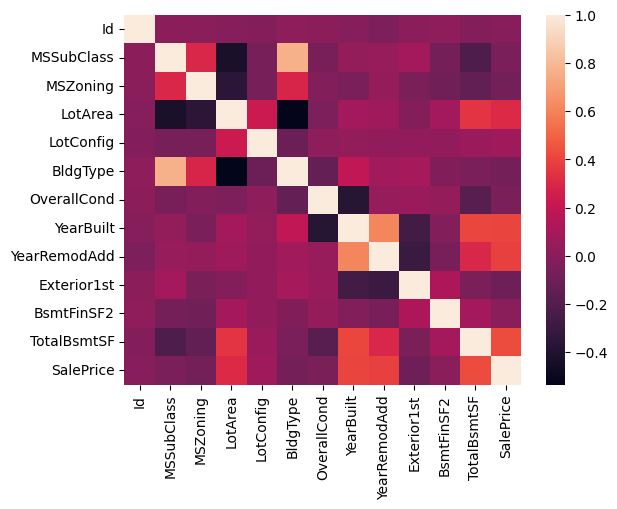

In [34]:
import matplotlib.pyplot as plt
plt.fig=(10, 10)
sns.heatmap(new_df.corr())

In [35]:
#Prcoeeding further to model selection and checking the accuracy which of them are more accuracy will then final it.
#Importing libraries of model which are required: 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [36]:
#Model calling or model creation
model1 = SVR()
model2 = RandomForestRegressor()
model3 = LinearRegression()

In [37]:
#Storing x and y in a variable so as to split data into train test manner
ind = new_df[['YearBuilt', 'LotArea', 'TotalBsmtSF']]
dep = new_df['SalePrice'].astype(int)

In [38]:
#train tezt splitting of data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

Xtrain, Xtest, ytrain, ytest = train_test_split(ind, dep, test_size = 0.25)

In [39]:
mean_sale_price = new_df['SalePrice'].mean

In [40]:
mean_sale_price

<bound method Series.mean of 0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914    177332.0
2915    177332.0
2916    177332.0
2917    177332.0
2918    177332.0
Name: SalePrice, Length: 2913, dtype: float64>

In [41]:
models = [model1, model2, model3]

for model in models:
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)
    percentage_rmse = (rmse / 208500) * 100
    print(f"Model: {model.__class__.__name__}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Percentage RMSE: {percentage_rmse}%")
    print("\n")

Model: SVR
Root Mean Squared Error (RMSE): 48836.522029359956
Percentage RMSE: 23.422792340220603%


Model: RandomForestRegressor
Root Mean Squared Error (RMSE): 41259.49896757927
Percentage RMSE: 19.78872852162075%


Model: LinearRegression
Root Mean Squared Error (RMSE): 41063.85513968979
Percentage RMSE: 19.694894551409973%




In [42]:
# Assuming mse is the Mean Squared Error and mean_sale_price is the mean sale price
